In [16]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install gdown
import gdown
#this way, anyone can access the files without mounting google driving. Accessing the csv files:
csvFileID = '1GZEf5NV8rX1xbqfaoOp0qrnhzyBQLZ0I'
url = f'https://drive.google.com/uc?id={csvFileID}'
csvOutputFile = 'binary_classification_train.csv'
gdown.download(url, csvOutputFile, quiet=False)

#accessing the module files:
moduleFileID = '1Y_VoUR3hHb1CLqADGuHwMuQdi0Ky2aPo'
url = f'https://drive.google.com/uc?id={moduleFileID}'
moduleOutputFile = 'NeuralNetwork.py'
gdown.download(url, moduleOutputFile, quiet=False)
from NeuralNetwork import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Downloading...
From: https://drive.google.com/uc?id=1GZEf5NV8rX1xbqfaoOp0qrnhzyBQLZ0I
To: /content/binary_classification_train.csv
100%|██████████| 18.6M/18.6M [00:00<00:00, 210MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Y_VoUR3hHb1CLqADGuHwMuQdi0Ky2aPo
From (redirected): https://drive.google.com/uc?id=1Y_VoUR3hHb1CLqADGuHwMuQdi0Ky2aPo&confirm=t&uuid=bc9f7b15-1b24-4c02-8607-bca17c9d677b
To: /content/NeuralNetwork.py
100%|██████████| 14.0k/14.0k [00:00<00:00, 24.8MB/s]


In [2]:
data = pd.read_csv(csvOutputFile)

In [3]:
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-36.963099,-15.014703,87.100435,101.523360,82.106571,-10.956180,0.592326,-51.919028,-90.650434,...,-81.183744,13.101921,18.051450,-40.606288,-39.697053,-13.870802,173.722987,-17.349169,-82.550844,0
1,2,-43.715674,18.847116,89.543406,-71.319314,35.597052,126.358570,-29.837495,-40.473764,-94.079238,...,-37.848260,7.457352,-77.420742,53.773718,-100.124294,9.870650,11.592519,-106.123605,-92.796421,1
2,3,-30.737550,-63.729643,106.081332,81.773948,112.769976,-12.425351,-29.913286,-41.771200,16.424511,...,-106.610289,5.930143,-30.177083,-138.969234,-56.054914,-12.790661,164.832498,-37.412902,-85.441150,0
3,4,-27.674757,-118.869495,135.605213,99.130189,50.947548,-63.704785,-7.353057,-58.140229,-80.209027,...,-149.056417,3.893419,-74.100869,-47.659832,-48.209817,-36.264323,59.001922,-59.064134,-78.538639,0
4,5,-28.654141,-77.746597,85.215365,50.374774,79.763207,-32.703048,-28.152031,-63.994794,-153.566789,...,-102.731465,11.160205,-13.395073,9.416237,2.649524,-43.578704,52.261888,-66.081738,-80.325110,0


**bold text**

In [4]:
feature_col = [f"Feature_{i}" for i in range(1,21)]
X = data[feature_col].to_numpy()
Y = data['Class'].to_numpy()
IDs = data['ID'].to_numpy()

First try with [20,32,2] and [relu,soft]

Parameters initialized:  {'W1': (32, 20), 'b1': (32, 1), 'W2': (2, 32), 'b2': (2, 1)}
Working on fold 1.....
Epoch: 001, Cost: 0.245727, accuracy: 93.3151
Epoch: 002, Cost: 0.237913, accuracy: 93.6901
Epoch: 003, Cost: 0.235558, accuracy: 93.5807
Epoch: 004, Cost: 0.230908, accuracy: 93.9401
Epoch: 005, Cost: 0.228370, accuracy: 94.0443
Epoch: 006, Cost: 0.229570, accuracy: 94.1953
Epoch: 007, Cost: 0.226412, accuracy: 94.1198
Epoch: 008, Cost: 0.223615, accuracy: 94.1901
Epoch: 009, Cost: 0.222052, accuracy: 94.2448
Epoch: 010, Cost: 0.221960, accuracy: 94.2630
Epoch: 011, Cost: 0.219693, accuracy: 94.3828
Epoch: 012, Cost: 0.219450, accuracy: 94.4844
Epoch: 013, Cost: 0.218445, accuracy: 94.3932
Epoch: 014, Cost: 0.218411, accuracy: 94.3854
Epoch: 015, Cost: 0.219730, accuracy: 94.2969
Epoch: 016, Cost: 0.216569, accuracy: 94.4740
Epoch: 017, Cost: 0.215717, accuracy: 94.5078
Epoch: 018, Cost: 0.216267, accuracy: 94.4193
Epoch: 019, Cost: 0.215337, accuracy: 94.5104
Epoch: 020, Cost:

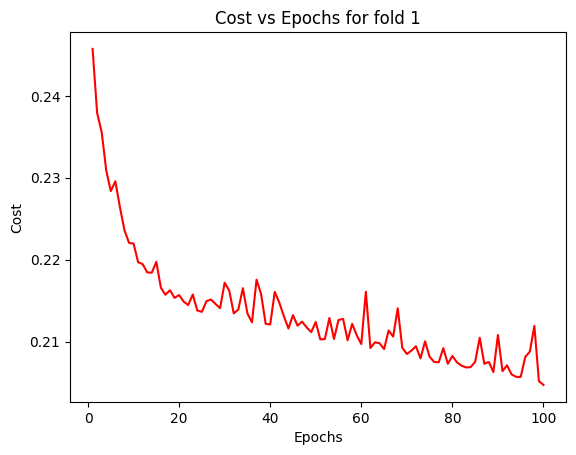

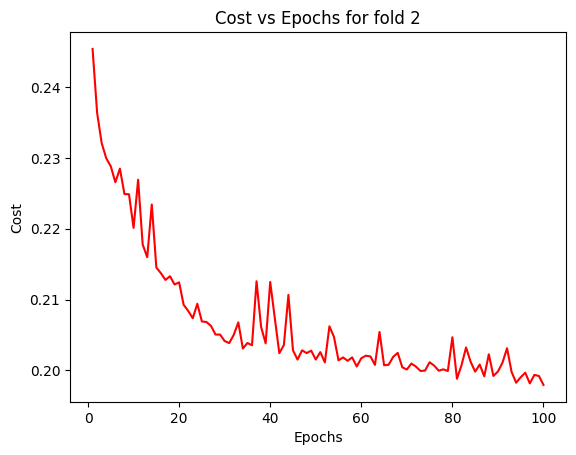

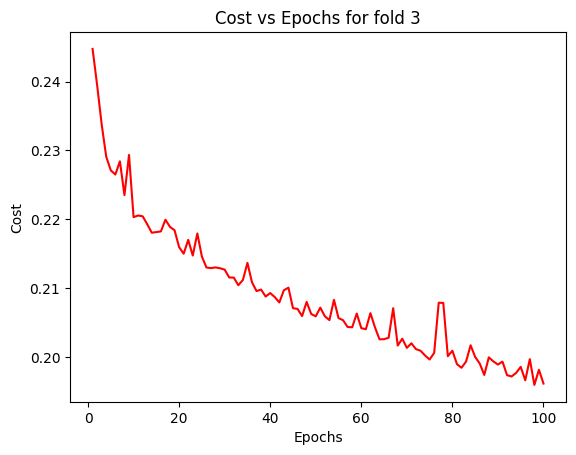

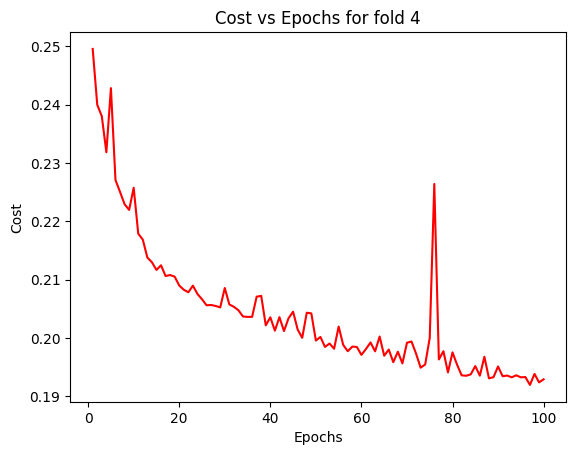

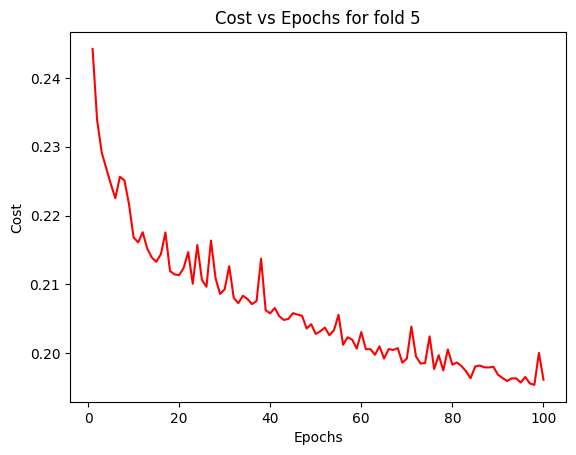

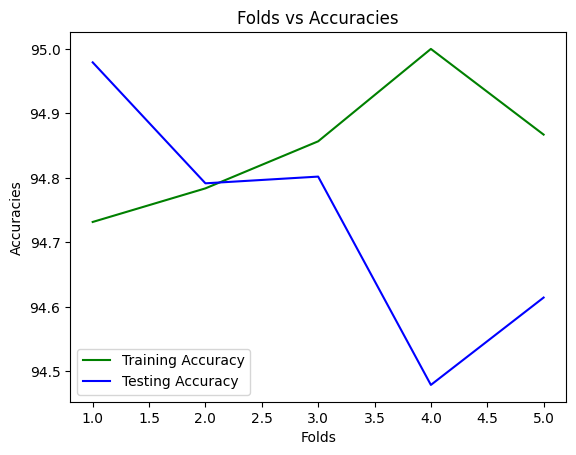

([94.73177083333333, 94.78385416666667, 94.85677083333334, 95.0, 94.8671875],
 [94.97916666666667,
  94.79166666666666,
  94.80208333333333,
  94.47916666666667,
  94.61458333333333],
 94.84791666666668,
 94.73333333333332)

In [19]:
l_list1 = [20,32,2]
act_funcs1 = ['relu', 'soft']
model1 = NeuralNetwork(l_list1,act_funcs1)
model1.k_fold_cv(X.T, Y, k_folds=5,cost_func='soft',details=False,plot_acc=True,plot_cost_vs_epoch=True,retrain=False,getConMat=True)

[20,32,2] gave good results, but from graph, alpha value should be lowered. setting it to 3e-3 from default value of 3e-2. Also adding complexity to network.

Parameters initialized:  {'W1': (64, 20), 'b1': (64, 1), 'W2': (2, 64), 'b2': (2, 1)}
Working on fold 1.....
Epoch: 001, Cost: 0.279009, accuracy: 91.4115
Epoch: 002, Cost: 0.263513, accuracy: 92.4167
Epoch: 003, Cost: 0.256621, accuracy: 92.7266
Epoch: 004, Cost: 0.252783, accuracy: 92.8646
Epoch: 005, Cost: 0.249352, accuracy: 93.1250
Epoch: 006, Cost: 0.246938, accuracy: 93.2240
Epoch: 007, Cost: 0.244913, accuracy: 93.3203
Epoch: 008, Cost: 0.243187, accuracy: 93.3594
Epoch: 009, Cost: 0.241749, accuracy: 93.5078
Epoch: 010, Cost: 0.240411, accuracy: 93.3828
Epoch: 011, Cost: 0.239161, accuracy: 93.5625
Epoch: 012, Cost: 0.237762, accuracy: 93.5677
Epoch: 013, Cost: 0.236689, accuracy: 93.6094
Epoch: 014, Cost: 0.235792, accuracy: 93.6042
Epoch: 015, Cost: 0.234870, accuracy: 93.6250
Epoch: 016, Cost: 0.234086, accuracy: 93.6536
Epoch: 017, Cost: 0.233253, accuracy: 93.6719
Epoch: 018, Cost: 0.232561, accuracy: 93.7318
Epoch: 019, Cost: 0.231949, accuracy: 93.7682
Epoch: 020, Cost:

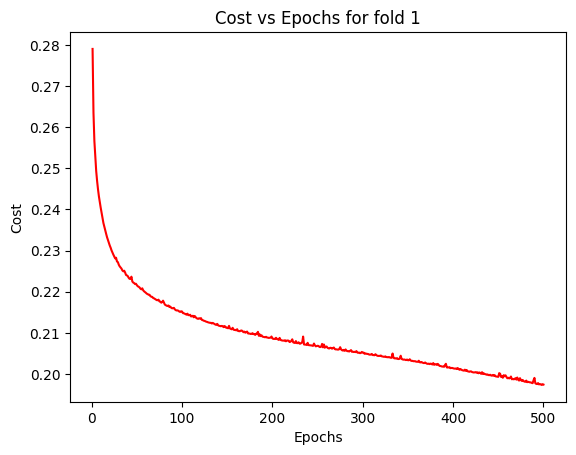

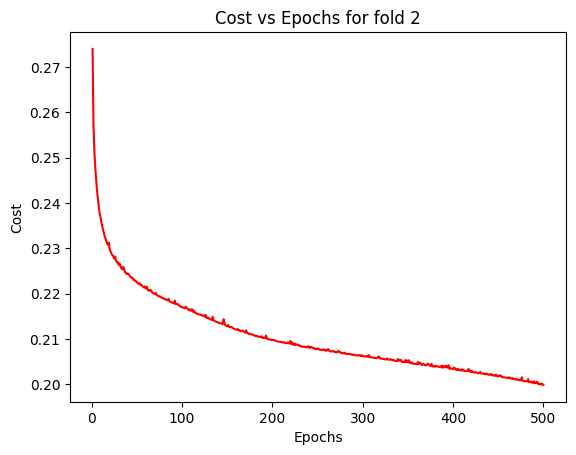

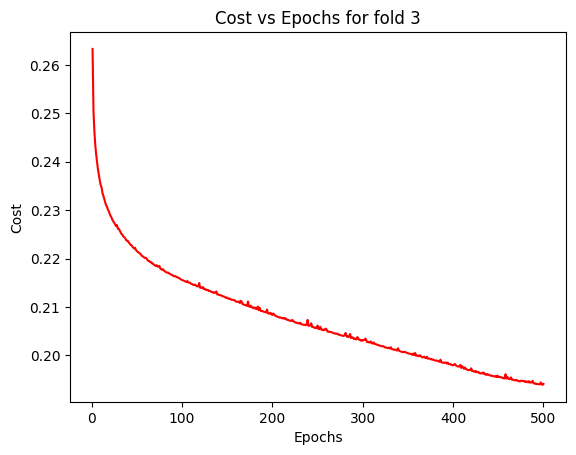

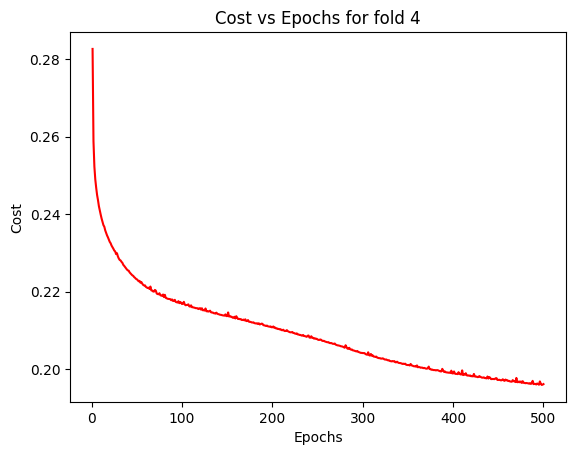

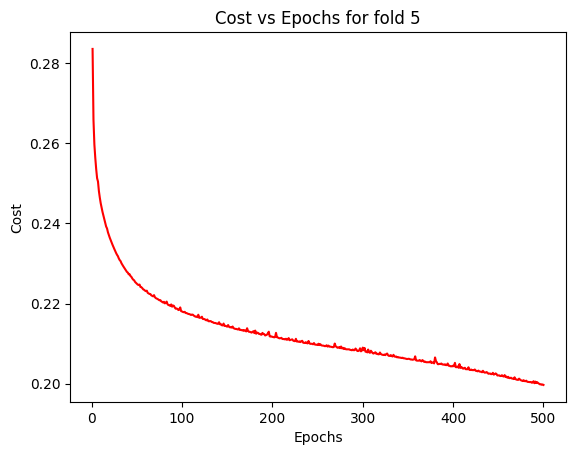

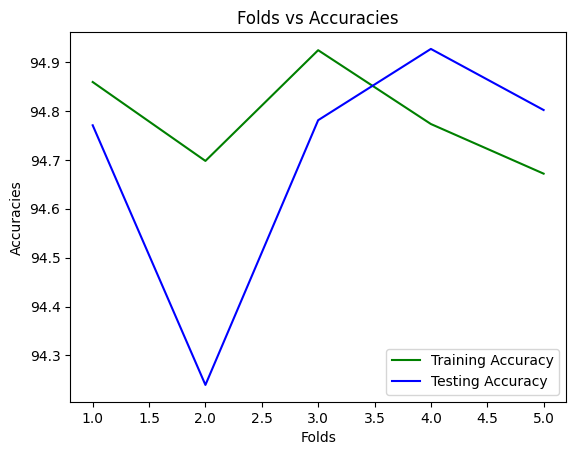

([94.859375, 94.69791666666667, 94.92447916666666, 94.7734375, 94.671875],
 [94.77083333333334,
  94.23958333333333,
  94.78125,
  94.92708333333333,
  94.80208333333333],
 94.78541666666668,
 94.70416666666667)

In [20]:
l_list2 = [20,64,2]
act_funcs2 = ['relu', 'soft']
model1 = NeuralNetwork(l_list2,act_funcs2, epochs=500,alpha=3e-3)
model1.k_fold_cv(X.T, Y, k_folds=5,cost_func='soft',details=False,plot_acc=True,plot_cost_vs_epoch=True,retrain=False,getConMat=True)

Even after increasing neurons, increasing epochs and decreasing alpha, accuracy didnt increase much. Now adding 1 more layer to network, setting alpha to default value and setting epocs = 100

Parameters initialized:  {'W1': (32, 20), 'b1': (32, 1), 'W2': (16, 32), 'b2': (16, 1), 'W3': (2, 16), 'b3': (2, 1)}
Working on fold 1.....
Epoch: 001, Cost: 0.239185, accuracy: 93.5573
Epoch: 002, Cost: 0.227525, accuracy: 93.8776
Epoch: 003, Cost: 0.222583, accuracy: 94.0260
Epoch: 004, Cost: 0.219588, accuracy: 94.2005
Epoch: 005, Cost: 0.217640, accuracy: 94.2031
Epoch: 006, Cost: 0.217310, accuracy: 94.3229
Epoch: 007, Cost: 0.214096, accuracy: 94.3281
Epoch: 008, Cost: 0.224963, accuracy: 94.2839
Epoch: 009, Cost: 0.210886, accuracy: 94.4688
Epoch: 010, Cost: 0.208916, accuracy: 94.5339
Epoch: 011, Cost: 0.208703, accuracy: 94.5677
Epoch: 012, Cost: 0.208339, accuracy: 94.4505
Epoch: 013, Cost: 0.205739, accuracy: 94.6172
Epoch: 014, Cost: 0.204665, accuracy: 94.6562
Epoch: 015, Cost: 0.203440, accuracy: 94.6641
Epoch: 016, Cost: 0.202457, accuracy: 94.6823
Epoch: 017, Cost: 0.201917, accuracy: 94.7109
Epoch: 018, Cost: 0.201037, accuracy: 94.7370
Epoch: 019, Cost: 0.200089, accu

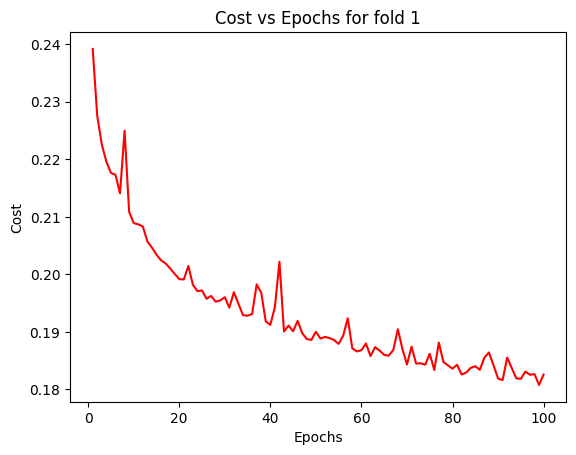

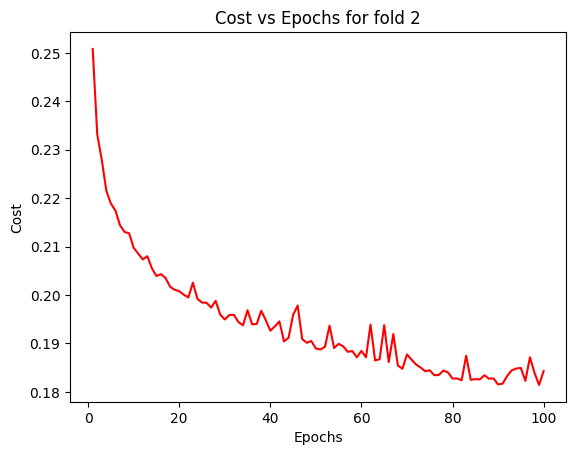

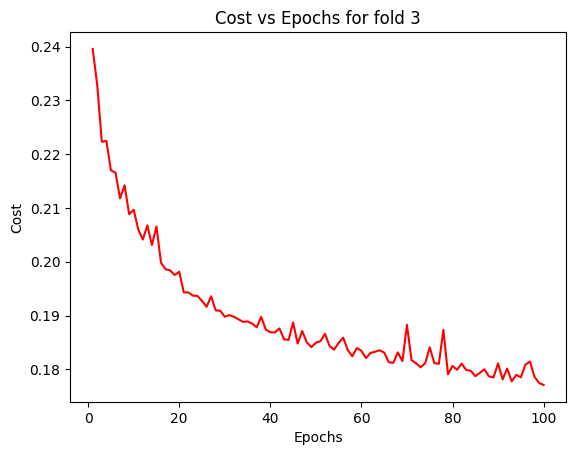

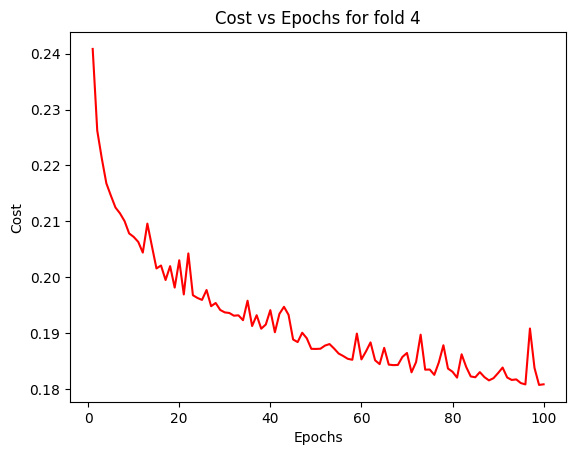

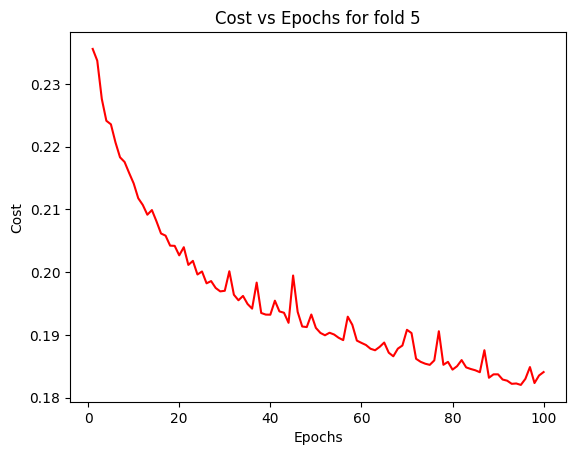

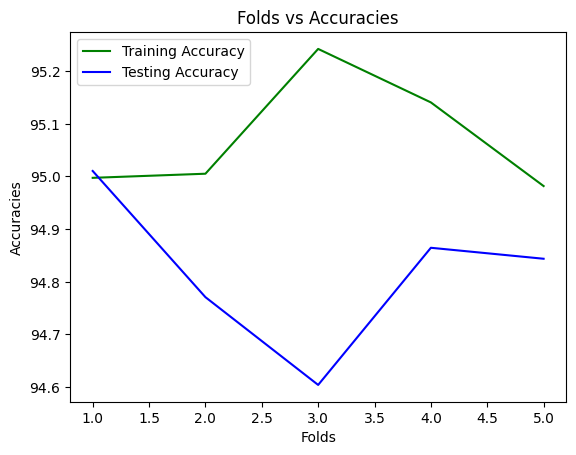

([94.99739583333333,
  95.00520833333333,
  95.2421875,
  95.140625,
  94.98177083333333],
 [95.01041666666666,
  94.77083333333334,
  94.60416666666667,
  94.86458333333333,
  94.84375],
 95.07343749999998,
 94.81875)

In [23]:
l_list3 = [20,32,16,2]
act_funcs3 = ['relu','relu', 'soft']
model3 = NeuralNetwork(l_list3,act_funcs3, epochs=100,alpha=3e-2)
model3.k_fold_cv(X.T, Y, k_folds=5,cost_func='soft',details=False,plot_acc=True,plot_cost_vs_epoch=True,retrain=False,getConMat=True)

From above it is clear that, alpha could be decreased by a factor of 3, and epochs must be increased as each fold didnt reach near the minima (ideal learning curve)

Parameters initialized:  {'W1': (32, 20), 'b1': (32, 1), 'W2': (16, 32), 'b2': (16, 1), 'W3': (2, 16), 'b3': (2, 1)}
Working on fold 1.....
Epoch: 001, Cost: 0.261286, accuracy: 92.5443
Epoch: 002, Cost: 0.243466, accuracy: 93.3880
Epoch: 003, Cost: 0.234776, accuracy: 93.6562
Epoch: 004, Cost: 0.228671, accuracy: 93.8620
Epoch: 005, Cost: 0.224847, accuracy: 93.9922
Epoch: 006, Cost: 0.222072, accuracy: 94.0443
Epoch: 007, Cost: 0.220824, accuracy: 94.1276
Epoch: 008, Cost: 0.218209, accuracy: 94.1849
Epoch: 009, Cost: 0.217912, accuracy: 94.1693
Epoch: 010, Cost: 0.215872, accuracy: 94.2266
Epoch: 011, Cost: 0.215635, accuracy: 94.2708
Epoch: 012, Cost: 0.213781, accuracy: 94.2943
Epoch: 013, Cost: 0.212893, accuracy: 94.3047
Epoch: 014, Cost: 0.212581, accuracy: 94.3438
Epoch: 015, Cost: 0.211313, accuracy: 94.3620
Epoch: 016, Cost: 0.212192, accuracy: 94.3854
Epoch: 017, Cost: 0.210016, accuracy: 94.3854
Epoch: 018, Cost: 0.209486, accuracy: 94.4193
Epoch: 019, Cost: 0.208885, accu

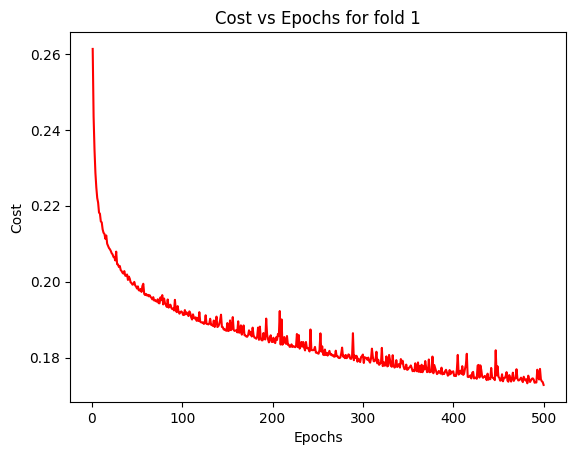

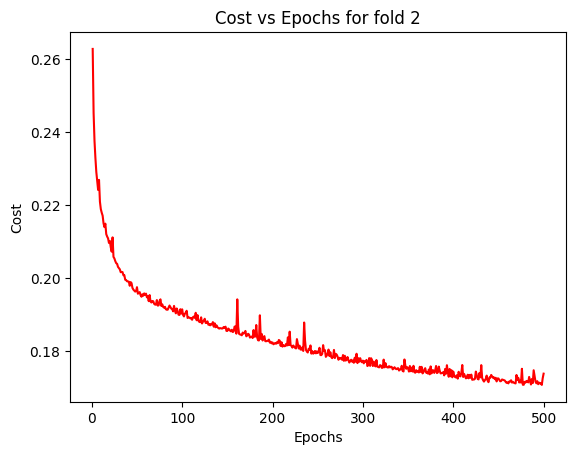

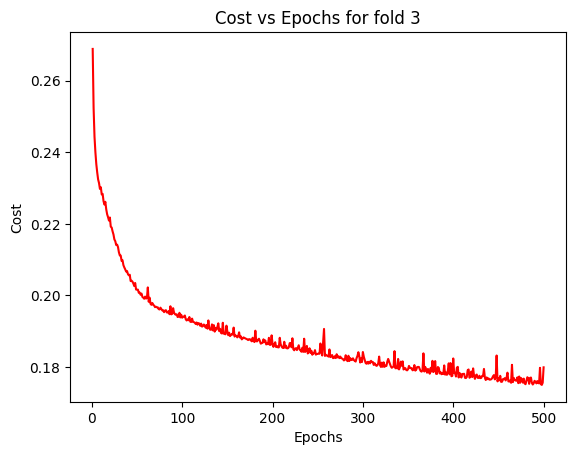

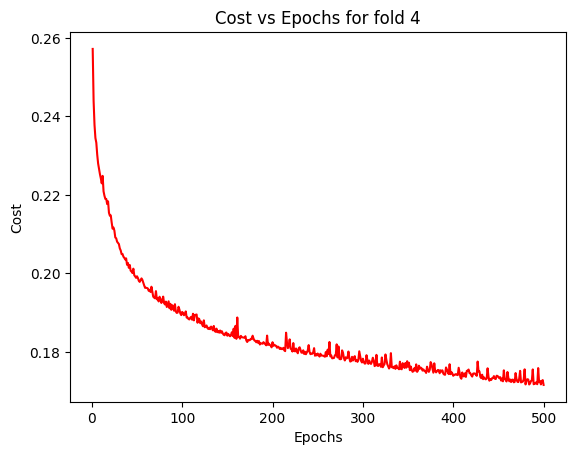

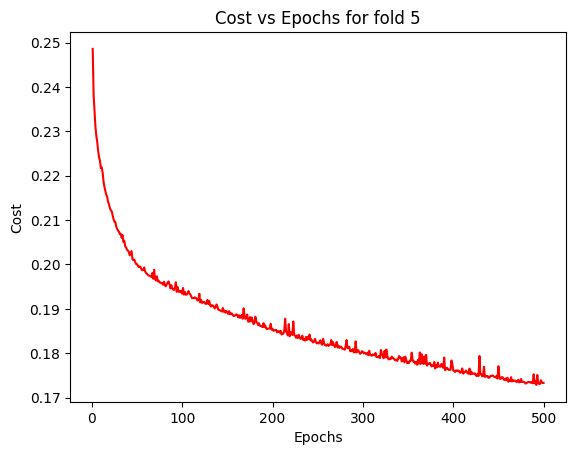

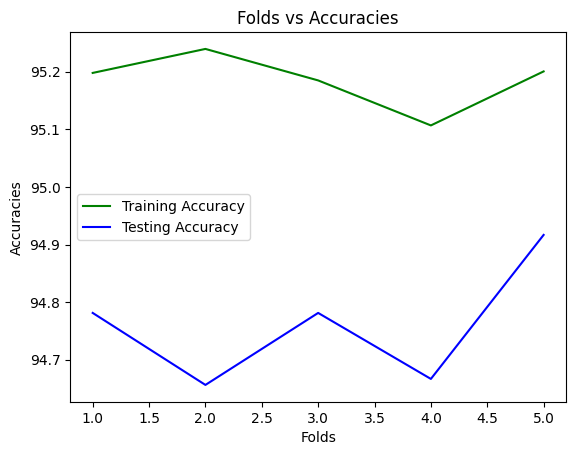

([95.19791666666667,
  95.23958333333333,
  95.18489583333334,
  95.10677083333333,
  95.20052083333333],
 [94.78125, 94.65625, 94.78125, 94.66666666666667, 94.91666666666667],
 95.1859375,
 94.76041666666667)

In [24]:
l_list4 = [20,32,16,2]
act_funcs4 = ['relu','relu', 'soft']
model4 = NeuralNetwork(l_list4,act_funcs4, epochs=500,alpha=1e-2)
model4.k_fold_cv(X.T, Y, k_folds=5,cost_func='soft',details=False,plot_acc=True,plot_cost_vs_epoch=True,retrain=False,getConMat=True)

Theres a slight overfitting in above, and also number of epochs seem to be insufficient. Adding complexity and turning regularization ON

Parameters initialized:  {'W1': (64, 20), 'b1': (64, 1), 'W2': (32, 64), 'b2': (32, 1), 'W3': (2, 32), 'b3': (2, 1)}
Working on fold 1.....
Epoch: 001, Cost: 0.260277, accuracy: 92.7760
Epoch: 002, Cost: 0.248411, accuracy: 93.4297
Epoch: 003, Cost: 0.239384, accuracy: 93.6875
Epoch: 004, Cost: 0.235643, accuracy: 93.7318
Epoch: 005, Cost: 0.232798, accuracy: 93.8411
Epoch: 006, Cost: 0.229632, accuracy: 93.9844
Epoch: 007, Cost: 0.226518, accuracy: 94.0312
Epoch: 008, Cost: 0.226795, accuracy: 94.1510
Epoch: 009, Cost: 0.223544, accuracy: 94.1510
Epoch: 010, Cost: 0.221974, accuracy: 94.2057
Epoch: 011, Cost: 0.221128, accuracy: 94.1068
Epoch: 012, Cost: 0.218961, accuracy: 94.2135
Epoch: 013, Cost: 0.218453, accuracy: 94.2005
Epoch: 014, Cost: 0.216731, accuracy: 94.2995
Epoch: 015, Cost: 0.216014, accuracy: 94.2865
Epoch: 016, Cost: 0.214959, accuracy: 94.3333
Epoch: 017, Cost: 0.214497, accuracy: 94.3516
Epoch: 018, Cost: 0.213734, accuracy: 94.3958
Epoch: 019, Cost: 0.213568, accu

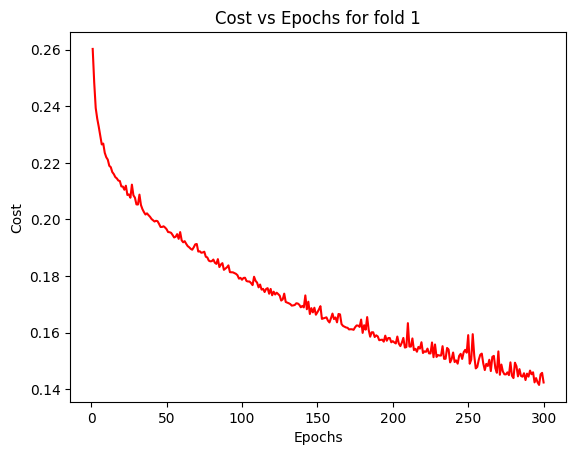

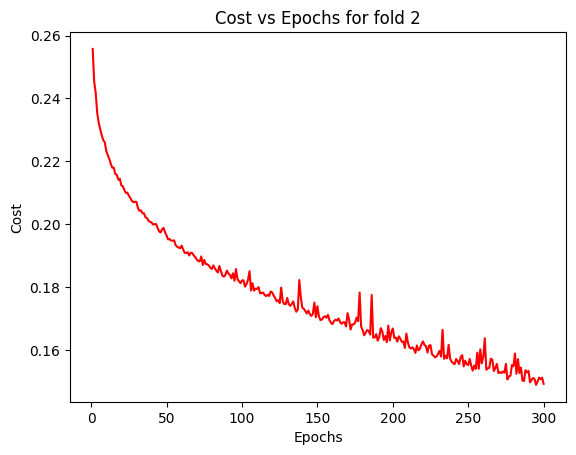

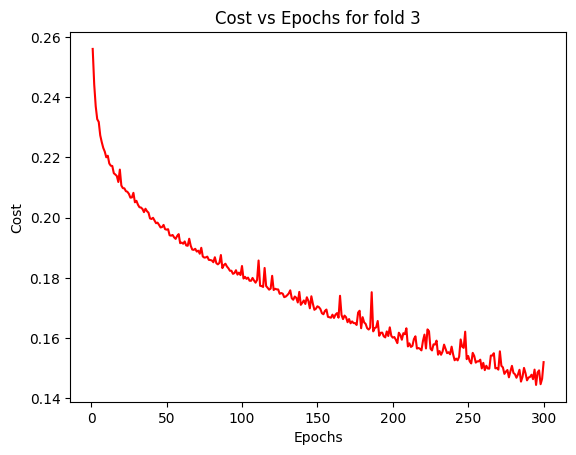

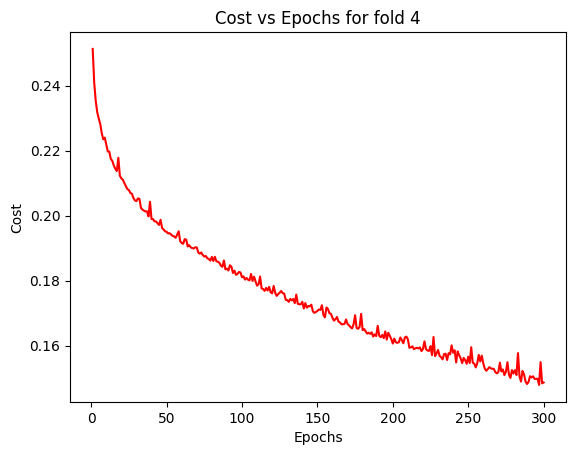

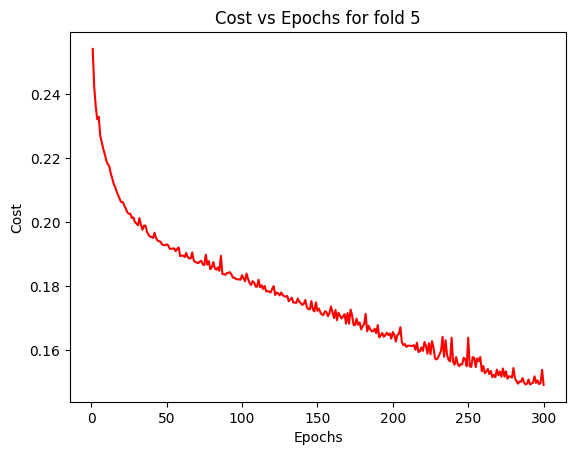

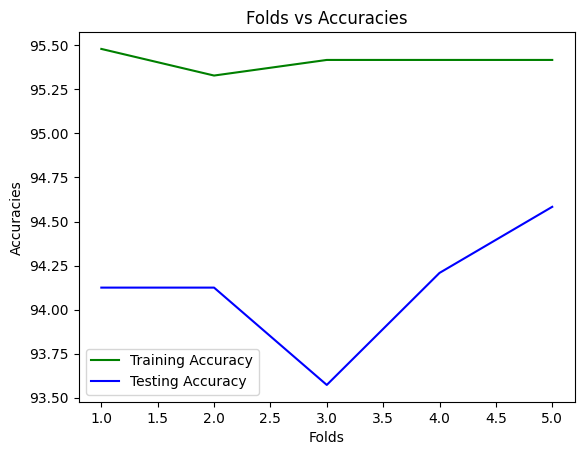

([95.47916666666667,
  95.328125,
  95.41666666666667,
  95.41666666666667,
  95.41666666666667],
 [94.125, 94.125, 93.57291666666666, 94.20833333333334, 94.58333333333333],
 95.41145833333334,
 94.12291666666667)

In [26]:
l_5 = [20, 64, 32, 2]
act_funcs5 = ['relu', 'relu', 'soft']
model5 = NeuralNetwork(l_5, act_funcs5, alpha=1e-2,epochs=300,reg_param=1e-5)
model5.k_fold_cv(X.T, Y,k_folds=5, cost_func='soft',details=False,retrain=False)

The results have declined. The best on would be [20,32,16,2], ['relu','relu', 'soft'], alpha=1e-2,epochs=500, reg_param=1e-4 or 3e-4.

Parameters initialized:  {'W1': (32, 20), 'b1': (32, 1), 'W2': (16, 32), 'b2': (16, 1), 'W3': (2, 16), 'b3': (2, 1)}
Working on fold 1.....
Epoch: 001, Cost: 0.279569, accuracy: 91.7500
Epoch: 002, Cost: 0.253779, accuracy: 92.9036
Epoch: 003, Cost: 0.241107, accuracy: 93.4922
Epoch: 004, Cost: 0.233575, accuracy: 93.7188
Epoch: 005, Cost: 0.228810, accuracy: 93.8151
Epoch: 006, Cost: 0.225226, accuracy: 93.9661
Epoch: 007, Cost: 0.222905, accuracy: 94.0234
Epoch: 008, Cost: 0.220849, accuracy: 94.0938
Epoch: 009, Cost: 0.219660, accuracy: 94.1693
Epoch: 010, Cost: 0.218169, accuracy: 94.1875
Epoch: 011, Cost: 0.216796, accuracy: 94.2552
Epoch: 012, Cost: 0.215973, accuracy: 94.2708
Epoch: 013, Cost: 0.214785, accuracy: 94.2995
Epoch: 014, Cost: 0.214121, accuracy: 94.3099
Epoch: 015, Cost: 0.213278, accuracy: 94.3281
Epoch: 016, Cost: 0.212903, accuracy: 94.3620
Epoch: 017, Cost: 0.211816, accuracy: 94.3750
Epoch: 018, Cost: 0.212806, accuracy: 94.3490
Epoch: 019, Cost: 0.210594, accu

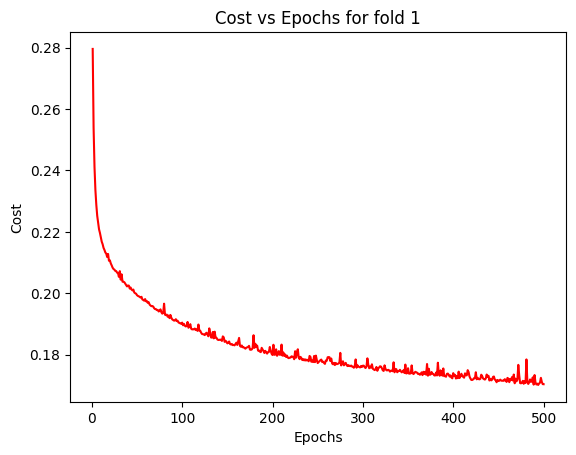

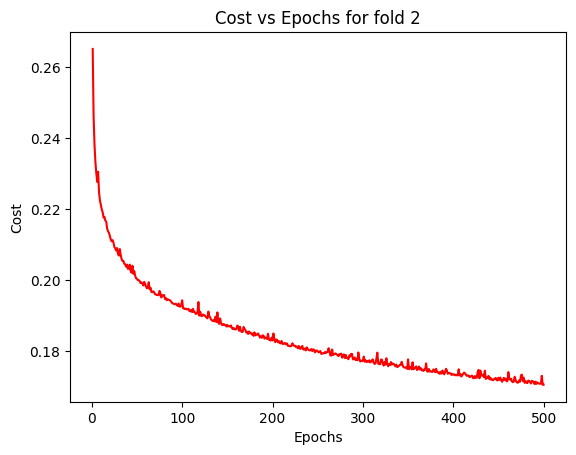

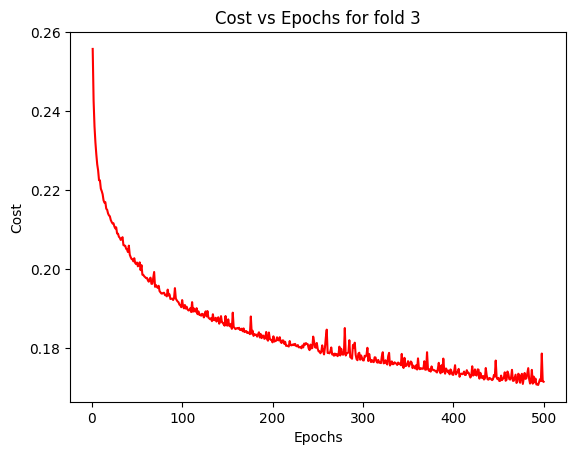

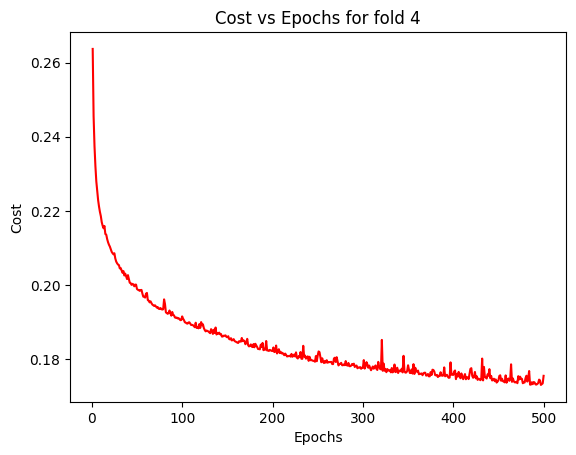

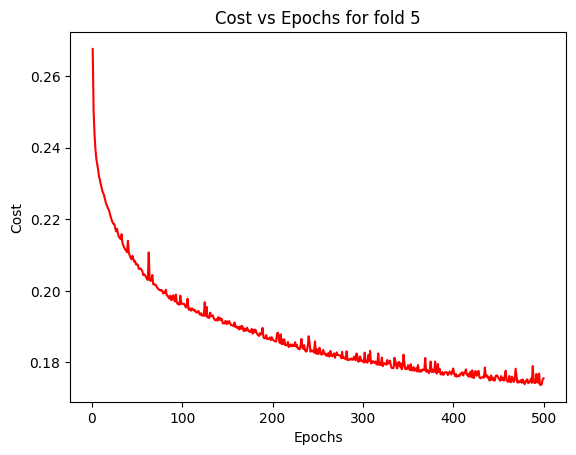

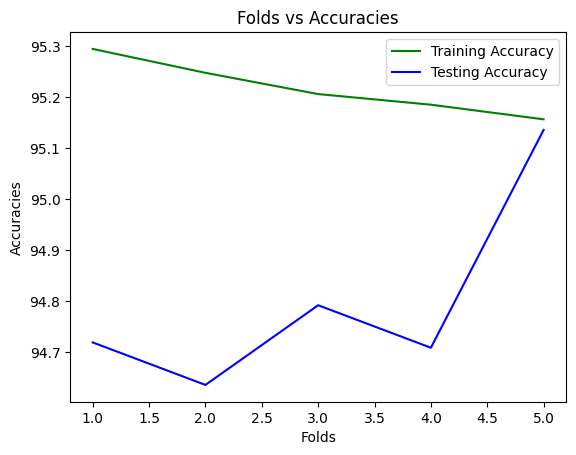

([95.29427083333334,
  95.24739583333334,
  95.20572916666666,
  95.18489583333334,
  95.15625],
 [94.71875,
  94.63541666666667,
  94.79166666666666,
  94.70833333333334,
  95.13541666666666],
 95.21770833333335,
 94.79791666666668)

In [27]:
l7 = [20,32,16,2]
act_funcs7 = ['relu','relu','soft']
model7 = NeuralNetwork(l7, act_funcs7, alpha=1e-2, epochs=500, reg_param=3e-4)
model7.k_fold_cv(X.T, Y,k_folds=5, cost_func='soft',details=False,retrain=False,)

In [22]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore


class NeuralNetwork:
  def __init__(self, layer_list, act_funcs, alpha = 3e-2, batch_size=32, epochs=100, reg_param=None):
    self.layer_list = layer_list
    self.alpha = alpha
    self.batch_size = batch_size
    self.epochs = epochs
    self.params = {}
    self.cache = {}
    self.reg_param = reg_param
    self.grads = {}
    self.act_funcs = act_funcs
    self._init_params(log_it=True)

  #Useful funcs:
  def _relu(self, z):
    return np.maximum(z,0)
  def _softmax(self, z):
    A = np.exp(z)/sum(np.exp(z))
    return A
  def _sigmoid(self, z):
    return 1/(1+np.exp(-z))
  def _reluDer(self, z):
    return (z >0).astype(int)
  def _get_deltaZ_lastLayer(self,A, Y):
    return A - Y
  def _compute_cost(self,A, Y, cost_func,reg=True):
    if 'soft' in cost_func:
        m = Y.shape[1]
        cost = -np.sum(Y * np.log(A)) / m
        cost += self._add_reg_term(m) if reg else 0
        return cost
    elif 'sigm' in cost_func:
        m = Y.shape[1]
        cost = (-1 / m) * np.sum(np.multiply(Y, np.log(A)) + np.multiply(1 - Y, np.log(1 - A)))
        cost += self._add_reg_term(m) if reg else 0
        return cost
    else:
        raise Exception("Unsupported Cost function")

  def _add_reg_term(self,m):
    L = len(self.layer_list) - 1
    reg_cost = 0.0
    for l in range(1,L+1):
      reg_cost += np.sum(self.params[f"W{l}"]**2)
    reg_cost = (reg_cost*self.reg_param)/(2*m)
    return reg_cost
  def _one_hot(self, Y):
    uniq_labels = np.unique(Y)
    C = len(uniq_labels)
    m = Y.size
    one_hot_Y = np.zeros((C, m))
    label_to_index = {label: index for index, label in enumerate(uniq_labels)}
    indices = [label_to_index[label] for label in Y]
    one_hot_Y[indices, np.arange(m)] = 1
    # for i in range(m):
    #   one_hot_Y[Y[i], i] = 1
    return one_hot_Y

    #params create:
  def _init_params(self,log_it=True):
    L = len(self.layer_list)
    for l in range(1,L):
      self.params[f"W{l}"] = np.random.randn(self.layer_list[l], self.layer_list[l-1]) * np.sqrt(2 / self.layer_list[l-1]) #He method
      self.params[f"b{l}"] = np.random.randn(self.layer_list[l], 1) * np.sqrt(2 / self.layer_list[l-1])
    print("Parameters initialized: ", {key: val.shape for key, val in self.params.items()}) if log_it else None
  def _fwd_prp(self, X):
    self.cache["A0"] = X
    L = len(self.layer_list) - 1
    for l in range(1, L+1):
      Z = np.dot(self.params[f"W{l}"], self.cache[f"A{l-1}"]) + self.params[f"b{l}"]
      self.cache[f"Z{l}"] = Z
      if "relu" in self.act_funcs[l-1]:
        self.cache[f"A{l}"] = self._relu(Z)
      elif 'sig' in self.act_funcs[l-1]:
        self.cache[f"A{l}"] = self._sigmoid(Z)
      elif 'soft' in self.act_funcs[l-1]:
        self.cache[f"A{l}"] = self._softmax(Z)
      else:
        raise Exception("Unsupported activation function")
    return self.cache[f"A{L}"]
  def _update_grads(self, X, Y):
    #No of layers
    L = len(self.layer_list) - 1
    m = Y.shape[1]
    A_last = self.cache[f"A{L}"]
    if self.act_funcs[L-1] == 'sigmoid' or "softmax":
      dZ = self._get_deltaZ_lastLayer(A_last, Y)
    self.grads[f"dZ{L}"] = dZ
    self.grads[f"dW{L}"] = np.dot(dZ, self.cache[f"A{L-1}"].T) / m
    self.grads[f"db{L}"] = np.sum(dZ, axis = 1, keepdims = True)
    if self.reg_param is not None:
      self.grads[f"dW{L}"] += (self.reg_param*self.params[f"W{L}"])/(2*m)
    for l in reversed(range(1,L)):
      dA = np.dot(self.params[f"W{l+1}"].T, dZ) #this is the dA of the current layer
      Z = self.cache[f"Z{l}"]
      A = self.cache[f"A{l}"]
      activation = self.act_funcs[l-1] #when l = 1, it is the first hidden layer, correspondingly , activations[0] gives the act func of that layer
      if activation == "relu":
        dZ = dA * self._reluDer(Z)
      elif activation == "sigmoid":
        dZ = dA * (A * (1 - A))
      else:
        raise ValueError(f"Unsupported activation function: {activation}")

      self.grads[f"dZ{l}"] = dZ
      self.grads[f"dW{l}"] = (1/m)*np.dot(dZ, self.cache[f"A{l-1}"].T)
      self.grads[f"db{l}"] = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
      if self.reg_param is not None:
        self.grads[f"dW{l}"] += (self.reg_param*self.params[f"W{l}"])/(2*m)

    # return self.grads
  def _update_params(self):
      L = len(self.layer_list) - 1
      for l in range(1, L + 1):
          self.params[f"W{l}"] -= self.alpha*self.grads[f"dW{l}"]
          self.params[f"b{l}"] -= self.alpha*self.grads[f"db{l}"]


  def train(self, X, Y, cost_func = 'soft',details=True,plot_costs=True):
    m = X.shape[1]
    if 'sigm' in self.act_funcs[-1]:
      Y = Y.reshape(1,m)
    else:
      Y = self._one_hot(Y)
    J_history_batches = []
    J_history_entire = []
    for epoch in range(1, self.epochs+1):
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]

        batches = m // self.batch_size
        for k in range(0, batches):
            mini_batch_X = X_shuffled[:, k*self.batch_size:(k+1)*self.batch_size]
            mini_batch_Y = Y_shuffled[:, k*self.batch_size:(k+1)*self.batch_size]

            A_last = self._fwd_prp(mini_batch_X)
            self._update_grads(mini_batch_X, mini_batch_Y)
            self._update_params()
            cost = self._compute_cost(A_last, mini_batch_Y, cost_func,reg=False)
            J_history_batches.append(cost)
            cost += self._add_reg_term(mini_batch_Y.shape[1]) if self.reg_param is not None else 0.0
            # First I am appending normal cost, and then I am adding the reg term to it, for printing
            if details:
                print(f"Epoch: {epoch:03d}, Batch: {k+1}/{batches}, Cost: {cost:.6f}")
        if m % batches != 0:
            mini_batch_X = X_shuffled[:, batches*self.batch_size:m]
            mini_batch_Y = Y_shuffled[:, batches*self.batch_size:m]

            A_last = self._fwd_prp(mini_batch_X)
            self._update_grads(mini_batch_X, mini_batch_Y)
            self._update_params()
            cost = self._compute_cost(A_last, mini_batch_Y, cost_func)
            J_history_batches.append(cost)
            cost += self._add_reg_term(mini_batch_Y.shape[1]) if self.reg_param is not None else 0
            if details:
                print(f"Epoch: {epoch:03d}, Batch: last, Cost: {cost:.6f}")
        A_last = self._fwd_prp(X_shuffled)
        cost = self._compute_cost(A_last, Y_shuffled, cost_func,reg=False)
        J_history_entire.append(cost)
        cost += self._add_reg_term(Y_shuffled.shape[1]) if self.reg_param is not None else 0
        if 'sigm' in self.act_funcs[-1]:
          predictions = self.predict_bin(X_shuffled)
        else:
          predictions = self.predict(X_shuffled)
        true_Y = np.argmax(Y_shuffled, axis=0)
        accuracy = self.get_accuracy(predictions, true_Y)
        print(f"Epoch: {epoch:03d}, Cost: {cost:.6f}, accuracy: {accuracy:.4f}")
    self._plotter(J_history_entire) if plot_costs else None
    return J_history_batches, J_history_entire


  def predict(self, X):
      A_last = self._fwd_prp(X)
      predictions = np.argmax(A_last, axis = 0)
      return predictions
  def get_accuracy(self, predictions, Y):
      accuracy = 100* np.mean(predictions == Y)
      return accuracy

  def k_fold_cv(self, X, Y, k_folds, cost_func, details=True,plot_acc=True,plot_cost_vs_epoch=True,retrain=True, getConMat=True):
    """Dont pass in standardized X in here"""
    m = X.shape[1]
    indices = np.random.permutation(m)
    X_shuffled = X[:, indices]
    if plot_cost_vs_epoch:
      J_hist_list = []
    # Y = self._one_hot(Y) dont use one hot here, as the train function takes the 1d Y and does the one hot there only
    Y_shuffled = Y[indices]
    fold_size = m//k_folds
    training_accuracies = []
    testing_accuracies = []
    for fold in range(k_folds):
      print(f"Working on fold {fold+1}.....")
      test_start = fold*fold_size
      test_end = (fold+1)*fold_size if fold < k_folds - 1 else m
      self._init_params(log_it=False)
      X_train = np.concatenate((X_shuffled[:, :test_start], X_shuffled[:, test_end:]), axis = 1)
      Y_train = np.concatenate((Y_shuffled[:test_start], Y_shuffled[test_end:]))
      X_test = X_shuffled[:,test_start:test_end]
      Y_test = Y_shuffled[test_start:test_end]
      X_train_mean = (np.mean(X_train, axis=1))
      X_train_mean = X_train_mean.reshape((X_train_mean.size,1))
      X_train_std = (np.std(X_train, axis = 1))
      X_train_std = X_train_std.reshape((X_train_mean.size,1))
      X_train = (X_train - X_train_mean)/X_train_std
      X_test  = (X_test - X_train_mean)/X_train_std
      useless,J_hist = self.train(X_train, Y_train, cost_func, details,plot_costs=False)
      if plot_cost_vs_epoch:
        J_hist_list.append(J_hist)
      training_predictions = self.predict_bin(X_train) if 'sigm' in self.act_funcs[-1] else self.predict(X_train)
      testing_predictions = self.predict_bin(X_test) if 'sigm' in self.act_funcs[-1] else self.predict(X_test)
      # training_predictions = self.predict(X_train)
      # testing_predictions = self.predict(X_test)
      training_accuracy = self.get_accuracy(training_predictions, Y_train)
      # print(f"The training accuracy for fold: {fold+1} is {training_accuracy:.4f}")
      testing_accuracy = self.get_accuracy(testing_predictions, Y_test)
      # print(f"The testing accuracy for fold: {fold+1} is {testing_accuracy:.4f}")
      if getConMat:
        print("Training Confusion Matrix: ")
        self.print_con_mat(self.get_conf_mat(Y_train, training_predictions))
        print("Testing Confusion Matrix: ")
        self.print_con_mat(self.get_conf_mat(Y_test, testing_predictions))
      print("Training Classification Report: ")
      self.classification_report(Y_train, training_predictions)
      print("Testing Classification Report: ")
      self.classification_report(Y_test, testing_predictions)
      training_accuracies.append(training_accuracy)
      testing_accuracies.append(testing_accuracy)
      print(f"Fold {fold+1} Completed!")
      print(f"Starting fold {fold+2}") if fold < k_folds - 1 else None
    mean_of_training_accuracies = np.mean(training_accuracies)
    mean_of_testing_accuracies = np.mean(testing_accuracies)
    print(f"Mean of training accuracies: {mean_of_training_accuracies:.4f}")
    print(f"Mean of testing accuracies: {mean_of_testing_accuracies:.4f}")
    if plot_cost_vs_epoch:
      for fold in range(k_folds):
            plt.plot(np.arange(1,len(J_hist_list[fold])+1), J_hist_list[fold], c='r')
            plt.xlabel('Epochs')
            plt.ylabel('Cost')
            plt.title(f"Cost vs Epochs for fold {fold+1}")
            plt.show()
    if retrain:
      print("Retraining the model on the entire dataset....")
      self._init_params(log_it=True)
      self.train(X, Y, cost_func, details,plot_costs=False)
      print("Retraining complete.")


    self._plotter_for_CV(training_accuracies,testing_accuracies) if plot_acc else None

    return training_accuracies, testing_accuracies, mean_of_training_accuracies, mean_of_testing_accuracies


  def _plotter(self, J_history):
    plt.plot(np.arange(1,len(J_history)+1), J_history, c='r')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title("Cost vs Epochs")
    plt.show()

  def _plotter_for_CV(self, training_accuracies, testing_accuracies):
    k_folds = len(training_accuracies)
    plt.plot(np.arange(1,k_folds+1), training_accuracies, c='green',label='Training Accuracy')
    plt.plot(np.arange(1,k_folds+1), testing_accuracies, c='blue',label='Testing Accuracy')
    plt.xlabel("Folds")
    plt.ylabel("Accuracies")
    plt.title("Folds vs Accuracies")
    plt.legend()
    plt.show()
  def predict_bin(self,X):
      A_last = self._fwd_prp(X)
      # predictions = np.zeros((X.shape[0],))
      # for i in range(len(X.shape[0])):
      #   predictions[i] = 1 if A_last[i] > 0.5 else 0
      predictions = (A_last > 0.5).astype(int)
      return predictions

  def get_conf_mat(self, Y_act, Y_pred):
    n_cls = len(np.unique(Y_act))
    con_mat = np.zeros((n_cls, n_cls))
    for indx, label in enumerate(Y_act):
      con_mat[label, Y_pred[indx]] += 1

    return con_mat

  def print_con_mat(self, con_mat):
    print("Confusion matrix with predictions on X axis and actual values on Y")
    classes= np.arange(con_mat.shape[0])
    table = pd.DataFrame(con_mat, index=classes, columns=classes)
    print(table)

  def get_precision(self,con_mat):
    precs = np.zeros((con_mat.shape[0],))
    for i in range(con_mat.shape[0]):
      precs[i] = con_mat[i,i]/np.sum(con_mat[:,i])

    return precs

  def get_recall(self, con_mat):
    recs = np.zeros((con_mat.shape[0],))
    for i in range(con_mat.shape[0]):
      recs[i] = con_mat[i,i]/np.sum(con_mat[i,:])

    return recs

  def get_f1s(self, con_mat):
    precs = self.get_precision(con_mat)
    recs = self.get_recall(con_mat)
    f1s = 2*recs*precs/(recs + precs)
    return f1s

  def classification_report(self, Y_act, Y_pred):
    con_mat = self.get_conf_mat(Y_act, Y_pred)
    precs = self.get_precision(con_mat)
    recs = self.get_recall(con_mat)
    f1s = self.get_f1s(con_mat)
    supports = con_mat.sum(axis=1)
    classes= np.arange(con_mat.shape[0])
    reports = []
    for i in range(con_mat.shape[0]):
      reports.append([precs[i], recs[i], f1s[i], supports[i]])
    table1 = pd.DataFrame(reports,index=classes, columns=['precision','recall','f1-score','support'])
    # print(table1)
    wted_prec = np.average(precs, weights=supports)
    wted_rec = np.average(recs, weights=supports)
    wted_f1 = np.average(f1s, weights=supports)
    tot_support = np.sum(supports)
    wted_data = [[wted_prec,wted_rec,wted_f1,tot_support]]
    table2 = pd.DataFrame(wted_data,index=['Average (weighted)'],columns=['precision', 'recall', 'f1-score', 'support'])
    # print('\n\n', table2)
    table = pd.concat([table1, table2])
    print(table)
    print(f"Accuracy: {self.get_accuracy(Y_pred, Y_act)}%")